In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
df = pd.read_pickle(r'uspto_50.pickle')

In [3]:
df

,reactants_mol,products_mol,reaction_type,set
0,<rdkit.Chem.rdchem.Mol object at 0x7fd754536a90>,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c42c0>,<RX_1>,train
1,<rdkit.Chem.rdchem.Mol object at 0x7fd754536a40>,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c4310>,<RX_6>,train
2,<rdkit.Chem.rdchem.Mol object at 0x7fd754536ae0>,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c4360>,<RX_9>,train
3,<rdkit.Chem.rdchem.Mol object at 0x7fd754536b30>,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c43b0>,<RX_6>,train
4,<rdkit.Chem.rdchem.Mol object at 0x7fd754536b80>,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c4400>,<RX_1>,train
...,...,...,...,...
50032,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c4130>,<rdkit.Chem.rdchem.Mol object at 0x7fd6fab2fcc0>,<RX_1>,test
50033,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c4180>,<rdkit.Chem.rdchem.Mol object at 0x7fd6fab2fd10>,<RX_6>,test
50034,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c41d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd6fab2fd60>,<RX_7>,test
50035,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c4220>,<rdkit.Chem.rdchem.Mol object at 0x7fd6fab2fdb0>,<RX_10>,test


In [4]:
df_test = df[df['set'] == 'test'].copy()

In [5]:
df_test

,reactants_mol,products_mol,reaction_type,set
45033,<rdkit.Chem.rdchem.Mol object at 0x7fd733bba180>,<rdkit.Chem.rdchem.Mol object at 0x7fd737153d10>,<RX_1>,test
45034,<rdkit.Chem.rdchem.Mol object at 0x7fd733bba1d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd737153d60>,<RX_4>,test
45035,<rdkit.Chem.rdchem.Mol object at 0x7fd733bba220>,<rdkit.Chem.rdchem.Mol object at 0x7fd737153db0>,<RX_2>,test
45036,<rdkit.Chem.rdchem.Mol object at 0x7fd733bba270>,<rdkit.Chem.rdchem.Mol object at 0x7fd737153e00>,<RX_1>,test
45037,<rdkit.Chem.rdchem.Mol object at 0x7fd733bba2c0>,<rdkit.Chem.rdchem.Mol object at 0x7fd737153e50>,<RX_9>,test
...,...,...,...,...
50032,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c4130>,<rdkit.Chem.rdchem.Mol object at 0x7fd6fab2fcc0>,<RX_1>,test
50033,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c4180>,<rdkit.Chem.rdchem.Mol object at 0x7fd6fab2fd10>,<RX_6>,test
50034,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c41d0>,<rdkit.Chem.rdchem.Mol object at 0x7fd6fab2fd60>,<RX_7>,test
50035,<rdkit.Chem.rdchem.Mol object at 0x7fd7180c4220>,<rdkit.Chem.rdchem.Mol object at 0x7fd6fab2fdb0>,<RX_10>,test


In [6]:
df_test['input_smiles'] = df_test.apply(lambda x: Chem.CanonSmiles(Chem.MolToSmiles(x['products_mol'])), axis=1)

In [7]:
df_test['target_smiles'] = df_test.apply(lambda x: Chem.CanonSmiles(Chem.MolToSmiles(x['reactants_mol'])), axis=1)

In [8]:
df_test['input_smiles'].to_csv('chemformer_input_test.txt', header=False, index=False)
df_test['target_smiles'].to_csv('chemformer_target_test.txt', header=False, index=False)

In [9]:
len(Chem.MolToSmiles(df['products_mol'][0])), df['products_mol'][0].GetNumAtoms(), df['products_mol'][0].GetNumBonds()

(69, 41, 46)

In [10]:
df['num_reacts'] = df.apply(lambda x: len(Chem.MolToSmiles(x[0]).split('.')), axis=1)
df['num_prods'] = df.apply(lambda x: len(Chem.MolToSmiles(x[1]).split('.')), axis=1)

In [11]:
df[df['num_prods'] == 1].count()

reactants_mol    50037
products_mol     50037
reaction_type    50037
set              50037
num_reacts       50037
num_prods        50037
dtype: int64

In [12]:
df[df['num_reacts'] == 1].count(), df[df['num_reacts'] == 2].count(), df[df['num_reacts'] == 3].count(), df[df['num_reacts'] == 4].count()

(reactants_mol    14665
 products_mol     14665
 reaction_type    14665
 set              14665
 num_reacts       14665
 num_prods        14665
 dtype: int64,
 reactants_mol    35244
 products_mol     35244
 reaction_type    35244
 set              35244
 num_reacts       35244
 num_prods        35244
 dtype: int64,
 reactants_mol    127
 products_mol     127
 reaction_type    127
 set              127
 num_reacts       127
 num_prods        127
 dtype: int64,
 reactants_mol    1
 products_mol     1
 reaction_type    1
 set              1
 num_reacts       1
 num_prods        1
 dtype: int64)

In [13]:
df['reactants_mol'] = df.apply(lambda x: [Chem.MolFromSmiles(smile) for smile in Chem.MolToSmiles(x[0]).split('.')], axis=1)

In [63]:
df.head()

,reactants_mol,products_mol,reaction_type,set,num_reacts,num_prods,ratio,log_ratio,reaction_template
0,[<rdkit.Chem.rdchem.Mol object at 0x7fab77f401...,<rdkit.Chem.rdchem.Mol object at 0x7fabb519b1d0>,<RX_1>,train,2,1,1.121951,0.115069,1
1,[<rdkit.Chem.rdchem.Mol object at 0x7fab77f405...,<rdkit.Chem.rdchem.Mol object at 0x7fabb519b220>,<RX_6>,train,1,1,1.045455,0.044452,6
2,[<rdkit.Chem.rdchem.Mol object at 0x7fab77f406...,<rdkit.Chem.rdchem.Mol object at 0x7fabb519b270>,<RX_9>,train,2,1,1.384615,0.325422,9
3,[<rdkit.Chem.rdchem.Mol object at 0x7fab77f407...,<rdkit.Chem.rdchem.Mol object at 0x7fabb519b2c0>,<RX_6>,train,1,1,1.318182,0.276253,6
4,[<rdkit.Chem.rdchem.Mol object at 0x7fab77f408...,<rdkit.Chem.rdchem.Mol object at 0x7fabb519b310>,<RX_1>,train,2,1,1.052632,0.051293,1


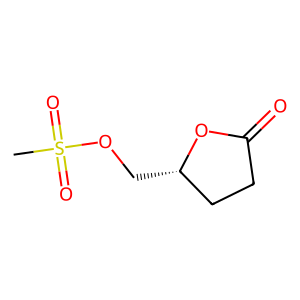

In [7]:
Draw.MolToImage(df['reactants_mol'][0][0])

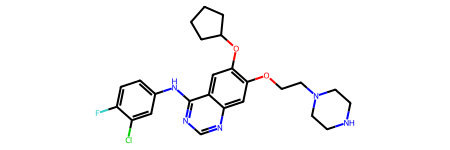

In [8]:
df['reactants_mol'][0][1]

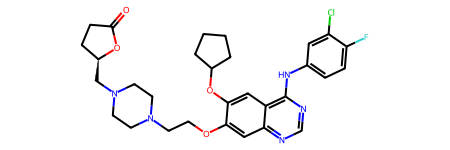

In [9]:
df['products_mol'][0]

In [ ]:
s1 = Chem.MolToSmiles(df['products_mol'][0])

In [ ]:
s1

In [ ]:
s2 = Chem.MolFromSmiles('O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccccc5)c4cc3OC3CCCC3)CC2)O1')

In [ ]:
Chem.CanonSmiles(Chem.MolToSmiles(s2)) == Chem.MolToSmiles(s2)

In [ ]:
df['products_mol'][0].HasSubstructMatch(s2)

In [6]:
df['ratio'] = df.apply(lambda x: sum([m.GetNumAtoms() for m in x[0]])/x[1].GetNumAtoms(), axis=1)

In [7]:
df['log_ratio'] = df.apply(lambda x: np.log(x['ratio']), axis=1)

In [ ]:
df[df['ratio'] > 1.4]

In [ ]:
df["num_reacts"].value_counts()

In [ ]:
df['ratio'].describe()

In [ ]:
df[df['ratio']>5].count()

<AxesSubplot: xlabel='ratio', ylabel='Count'>

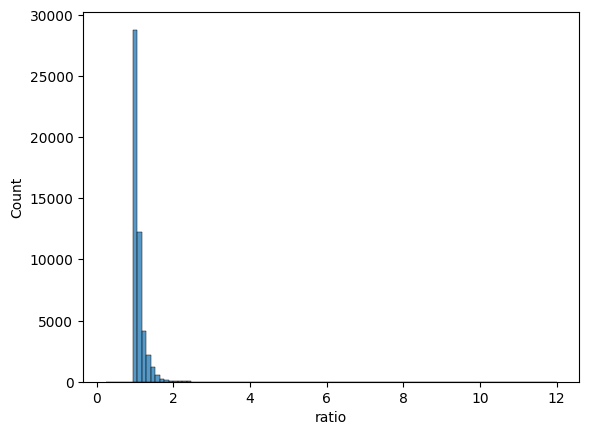

In [12]:
sns.histplot(data=df, x="ratio", bins=100)

In [8]:
df['prod_smiles'] = df.apply(lambda row: Chem.CanonSmiles(Chem.MolToSmiles(row['products_mol'])), axis=1)

In [9]:
df['prod_smiles'].unique().shape

(49673,)

In [10]:
pick_ratio, pick_idx = 2.0, 1

In [11]:
df[df['ratio'] == pick_ratio]

,reactants_mol,products_mol,reaction_type,set,num_reacts,num_prods,ratio,log_ratio,prod_smiles
107,[<rdkit.Chem.rdchem.Mol object at 0x7f79f4a5cd...,<rdkit.Chem.rdchem.Mol object at 0x7f79d49d4090>,<RX_8>,train,2,1,2.0,0.693147,Cc1ccc(C#N)c[n+]1[O-]
1939,[<rdkit.Chem.rdchem.Mol object at 0x7f79f81e17...,<rdkit.Chem.rdchem.Mol object at 0x7f79d5faca90>,<RX_6>,train,1,1,2.0,0.693147,NC/C=C\CCCC(=O)O
3138,[<rdkit.Chem.rdchem.Mol object at 0x7f79f9b792...,<rdkit.Chem.rdchem.Mol object at 0x7f79d733ca40>,<RX_7>,train,1,1,2.0,0.693147,c1ccc2ncncc2c1
3218,[<rdkit.Chem.rdchem.Mol object at 0x7f79f9b7fe...,<rdkit.Chem.rdchem.Mol object at 0x7f79d734b400>,<RX_7>,train,1,1,2.0,0.693147,CC(=O)O
5337,[<rdkit.Chem.rdchem.Mol object at 0x7f7a0204b2...,<rdkit.Chem.rdchem.Mol object at 0x7f79d90459f0>,<RX_7>,train,2,1,2.0,0.693147,CC(C)(C)OC(=O)N1C[C@@H](O)C(I)=C[C@H]1CO[Si](C...
7489,[<rdkit.Chem.rdchem.Mol object at 0x7f79e5c50c...,<rdkit.Chem.rdchem.Mol object at 0x7f79db44da90>,<RX_3>,train,2,1,2.0,0.693147,Cc1cc(-c2cnc(F)c(F)c2)on1
9665,[<rdkit.Chem.rdchem.Mol object at 0x7f79ed7205...,<rdkit.Chem.rdchem.Mol object at 0x7f79dc75b310>,<RX_3>,train,2,1,2.0,0.693147,O=[N+]([O-])c1ccccc1-c1cccs1
9845,[<rdkit.Chem.rdchem.Mol object at 0x7f79ed735c...,<rdkit.Chem.rdchem.Mol object at 0x7f79dc76cc70>,<RX_4>,train,2,1,2.0,0.693147,COC(=O)C12CCCC1O2
10523,[<rdkit.Chem.rdchem.Mol object at 0x7f79f02c8d...,<rdkit.Chem.rdchem.Mol object at 0x7f79dc7c0590>,<RX_3>,train,2,1,2.0,0.693147,O=[N+]([O-])c1cccc(/C=C/c2csc(C3CCC3)n2)c1
10616,[<rdkit.Chem.rdchem.Mol object at 0x7f79f02d54...,<rdkit.Chem.rdchem.Mol object at 0x7f79dc7ca360>,<RX_6>,train,1,1,2.0,0.693147,CC(C)(CO)CCCCN


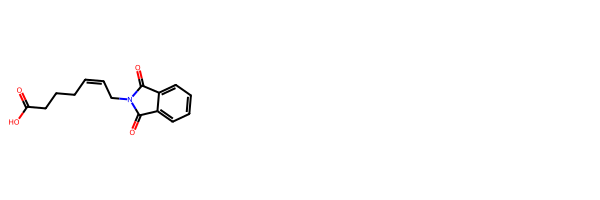

In [13]:
my_mol = []
for m in df[df['ratio'] == pick_ratio]['reactants_mol'].tolist()[pick_idx]:
    my_mol.append(m)
Draw.MolsToGridImage(my_mol)

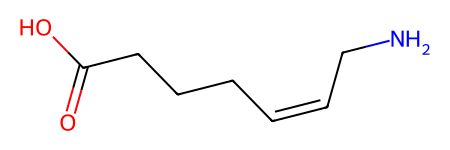

In [14]:
df[df['ratio'] == pick_ratio]['products_mol'].tolist()[pick_idx]

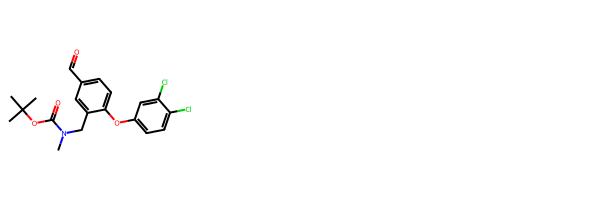

In [15]:
my_mol = []
for m in df[df['reaction_type'] == '<RX_7>']['reactants_mol'].tolist()[pick_idx]:
    my_mol.append(m)
Draw.MolsToGridImage(my_mol)

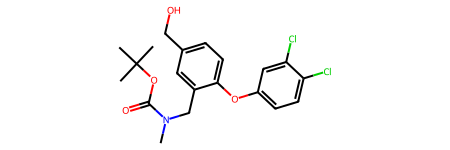

In [16]:
df[df['reaction_type'] == '<RX_7>']['products_mol'].tolist()[pick_idx]

In [17]:
df['reaction_template'] = df.apply(lambda x: int(x['reaction_type'][-2]), axis=1)

In [18]:
df.head()

,reactants_mol,products_mol,reaction_type,set,num_reacts,num_prods,ratio,log_ratio,prod_smiles,reaction_template
0,[<rdkit.Chem.rdchem.Mol object at 0x7f7a11e6dd...,<rdkit.Chem.rdchem.Mol object at 0x7f79d49c1e00>,<RX_1>,train,2,1,1.121951,0.115069,O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccc(F)c(Cl)...,1
1,[<rdkit.Chem.rdchem.Mol object at 0x7f7a11e6df...,<rdkit.Chem.rdchem.Mol object at 0x7f79d49c1e50>,<RX_6>,train,1,1,1.045455,0.044452,Nc1nc2[nH]c(CCCc3csc(C(=O)O)c3)cc2c(=O)[nH]1,6
2,[<rdkit.Chem.rdchem.Mol object at 0x7f7a11e6dc...,<rdkit.Chem.rdchem.Mol object at 0x7f79d49c1ea0>,<RX_9>,train,2,1,1.384615,0.325422,CC1(C)OB(c2cccc(Nc3nccc(C(F)(F)F)n3)c2)OC1(C)C,9
3,[<rdkit.Chem.rdchem.Mol object at 0x7f79e35d96...,<rdkit.Chem.rdchem.Mol object at 0x7f79d49c1ef0>,<RX_6>,train,1,1,1.318182,0.276253,CC(C)(C)OC(=O)NCC(=O)CCC(=O)OCCCC(=O)O,6
4,[<rdkit.Chem.rdchem.Mol object at 0x7f79e35d96...,<rdkit.Chem.rdchem.Mol object at 0x7f79d49c1f40>,<RX_1>,train,2,1,1.052632,0.051293,Fc1cc2c(NC3CCCCCC3)ncnc2cn1,1


In [19]:
y = df['reaction_template']

In [20]:
test_size = 300
test_size = test_size/len(df)

In [21]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=np.random.randint(0, 1e9))

split = sss.split(df, y)
train_indices = []
test_indices = []

for i, (train_index, test_index) in enumerate(sss.split(df, y)):
    # print(f"  Train: index={train_index}")
    # print(f"  Test:  index={test_index}")
    train_indices = train_index
    test_indices = test_index

In [22]:
df[df['reaction_template']==0]

,reactants_mol,products_mol,reaction_type,set,num_reacts,num_prods,ratio,log_ratio,prod_smiles,reaction_template
147,[<rdkit.Chem.rdchem.Mol object at 0x7f79f4a6bb...,<rdkit.Chem.rdchem.Mol object at 0x7f79d49d4d10>,<RX_10>,train,2,1,1.023810,0.023530,COc1cc(C(=O)N2CCN(C(=O)CCCC(O)C(c3ccc(F)cc3)c3...,0
174,[<rdkit.Chem.rdchem.Mol object at 0x7f79f4a6d1...,<rdkit.Chem.rdchem.Mol object at 0x7f79d49d95e0>,<RX_10>,train,2,1,1.466667,0.382992,COC(=O)c1cc2cccc(CBr)c2o1,0
328,[<rdkit.Chem.rdchem.Mol object at 0x7f79f4a7d8...,<rdkit.Chem.rdchem.Mol object at 0x7f79d49ef720>,<RX_10>,train,2,1,1.153846,0.143101,[N-]=[N+]=NCc1ccc(SCCl)cc1,0
717,[<rdkit.Chem.rdchem.Mol object at 0x7f79f5a232...,<rdkit.Chem.rdchem.Mol object at 0x7f79d5f1b3b0>,<RX_10>,train,2,1,1.538462,0.430783,O=c1[nH]nc(CBr)cc1C(F)(F)F,0
819,[<rdkit.Chem.rdchem.Mol object at 0x7f79f5a2ac...,<rdkit.Chem.rdchem.Mol object at 0x7f79d5f28450>,<RX_10>,train,2,1,1.250000,0.223144,CC(C)(C)OC(=O)c1ccc(CCn2c(CBr)c(C3CC3)cc(Cl)c2...,0
...,...,...,...,...,...,...,...,...,...,...
49697,[<rdkit.Chem.rdchem.Mol object at 0x7f79bc0c47...,<rdkit.Chem.rdchem.Mol object at 0x7f79b7b86d10>,<RX_10>,test,2,1,1.035714,0.035091,Cc1ccccc1CN(c1ccc(C#N)c(Cl)c1)[C@H]1CC(=O)N(CC...,0
49910,[<rdkit.Chem.rdchem.Mol object at 0x7f79bc0d4a...,<rdkit.Chem.rdchem.Mol object at 0x7f79b7ba6180>,<RX_10>,test,2,1,1.411765,0.344840,O=C(O)c1sc(-c2ccc(Cl)cc2)nc1CBr,0
49961,[<rdkit.Chem.rdchem.Mol object at 0x7f79bc0d90...,<rdkit.Chem.rdchem.Mol object at 0x7f79b7bac1d0>,<RX_10>,test,2,1,1.700000,0.530628,COP(=O)(/C=C/CBr)OC,0
50008,[<rdkit.Chem.rdchem.Mol object at 0x7f79bc0dd4...,<rdkit.Chem.rdchem.Mol object at 0x7f79b7bb00e0>,<RX_10>,test,2,1,1.318182,0.276253,COC(=O)C(Br)c1ccc(OCOc2ccc(Cl)cc2)cc1,0


(array([  227., 15122., 11913.,  5639.,   900.,   650.,  8353.,  4585.,
          814.,  1834.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

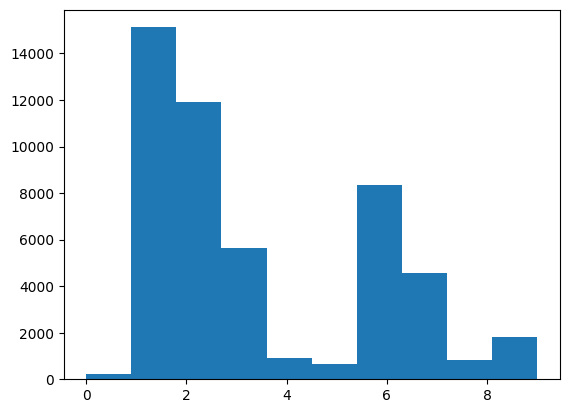

In [23]:
plt.hist(df['reaction_template'].tolist(), bins=10)

(array([ 1., 91., 71., 34.,  5.,  4., 50., 28.,  5., 11.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

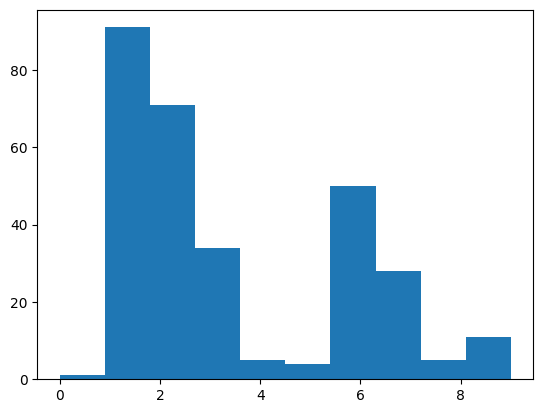

In [24]:
plt.hist(df.iloc[test_indices]['reaction_template'].tolist())

In [25]:
temp_df = df.iloc[test_indices].copy()

In [26]:
temp_df['reactants_mol'] = temp_df.apply(lambda x: [Chem.MolToSmiles(mol) for mol in x['reactants_mol']], axis=1)

In [27]:
temp_df['products_mol'] = temp_df.apply(lambda x: Chem.MolToSmiles(x['products_mol']), axis=1)

In [28]:
temp_df.to_csv('evaluation/300_weighted.csv')

In [109]:
new_df = pd.read_csv('evaluation/50_weighted.csv')